# Descriptive Statistics Task

Data Source: [Kaggle](https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales)

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
# data read
data = pd.read_csv('/content/processed_car_sales_data.csv')
data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [ ]:
data.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [ ]:
# types check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [ ]:
data.shape

(50000, 7)

In [ ]:
# Columns division by type

# numerical columns
numerical = data[['Engine size', 'Year of manufacture', 'Mileage', 'Price']]

# catigorical columns
catigorical = data[['Manufacturer', 'Model','Fuel type']]

print(numerical.columns)
print(catigorical.columns)

Index(['Engine size', 'Year of manufacture', 'Mileage', 'Price'], dtype='object')
Index(['Manufacturer', 'Model', 'Fuel type'], dtype='object')


<Axes: >

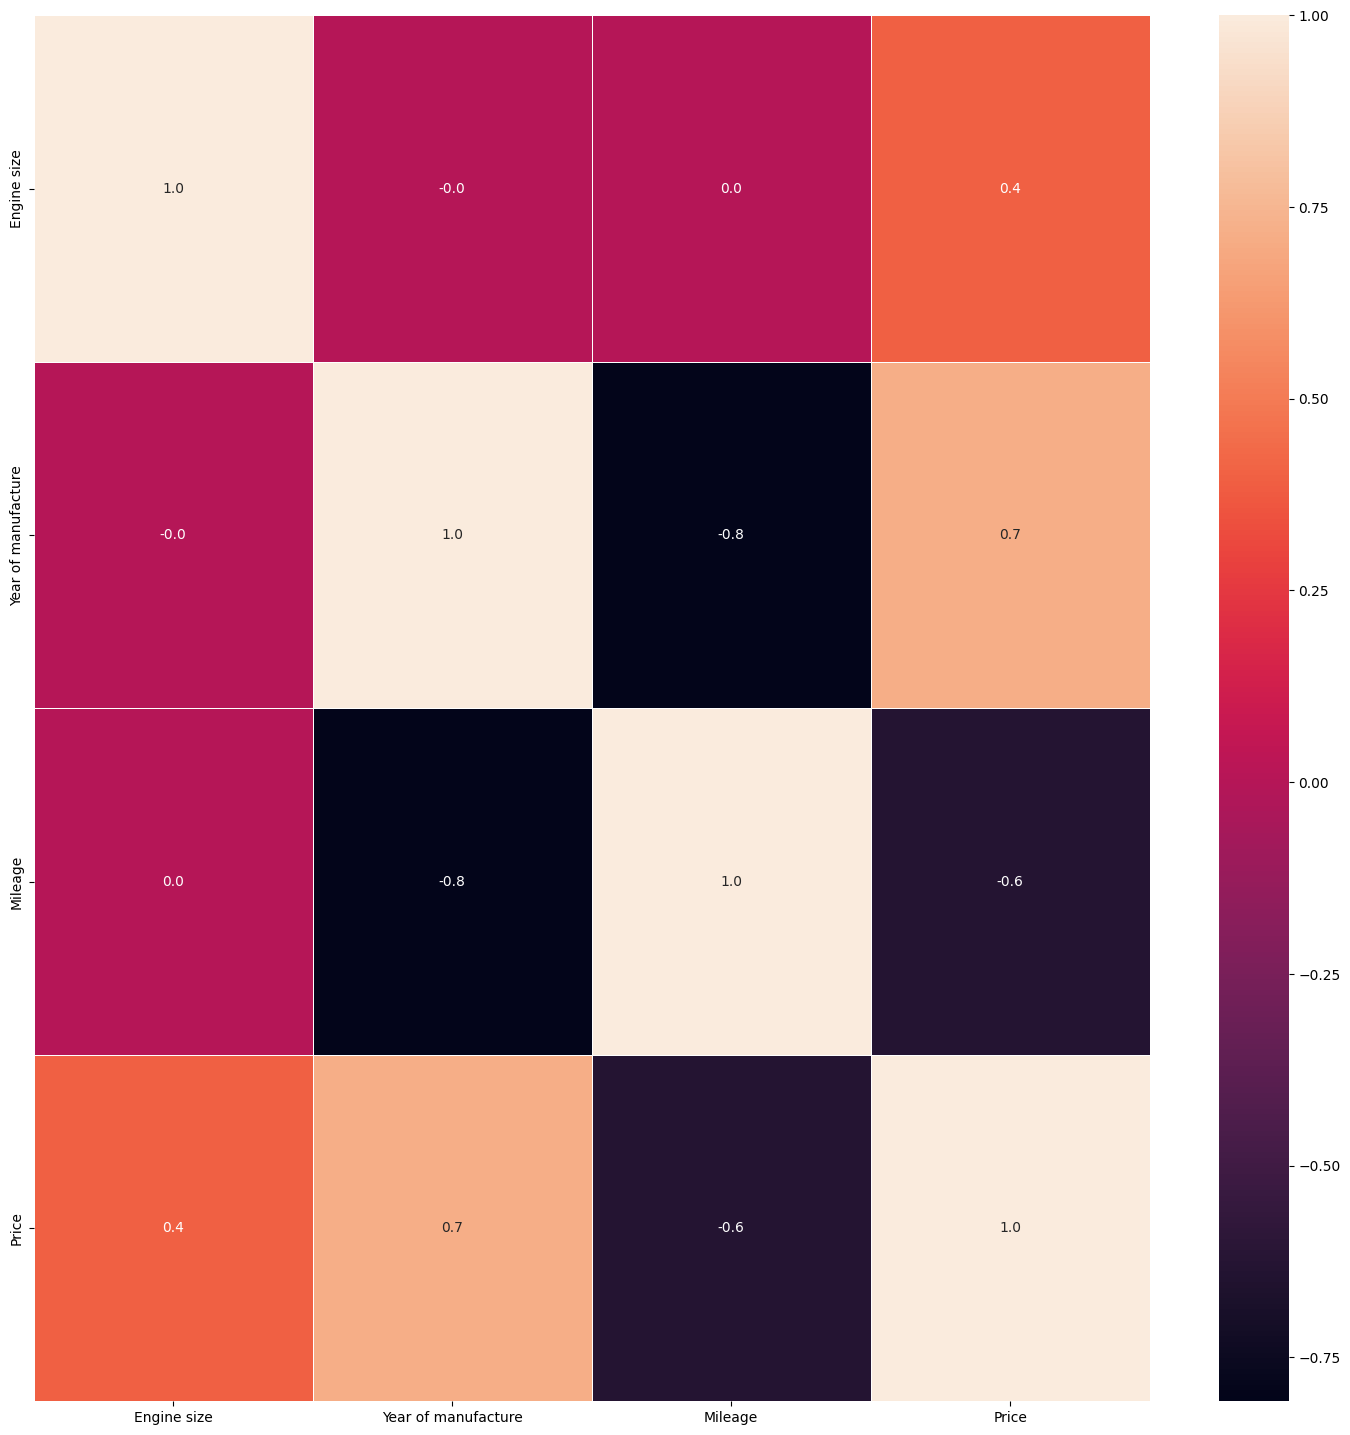

In [ ]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data[numerical.columns].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Numerical Data Statisitcs

#### Mean

In [ ]:
# calculate the mean and compare it
for col in numerical.columns:
  numeric_mean = data[col].sum() / data.shape[0]
  print(f"\nCalculated mean is for {col} is {numeric_mean}")
  print("Actual mean is", data[col].mean())


Calculated mean is for Engine size is 1.7730579999999998
Actual mean is 1.7730579999999998

Calculated mean is for Year of manufacture is 2004.20944
Actual mean is 2004.20944

Calculated mean is for Mileage is 112497.3207
Actual mean is 112497.3207

Calculated mean is for Price is 13828.90316
Actual mean is 13828.90316


#### Mode

In [ ]:
# calculate the mode and compare it
for col in numerical.columns:
    frequency = {}

    # count frequencies for this column
    for num in numerical[col]:
        frequency[num] = frequency.get(num, 0) + 1

    # find the max frequency
    max_frequency = max(frequency.values())

    # find all values with that frequency
    numeric_mode = [k for k, v in frequency.items() if v == max_frequency]

    # print results once per column
    print(f"\nCalculated mode for {col}: {numeric_mode}")
    print("Actual mode:", list(numerical[col].mode()))


Calculated mode for Engine size: [1.4]
Actual mode: [1.4]

Calculated mode for Year of manufacture: [2018]
Actual mode: [2018]

Calculated mode for Mileage: [11500]
Actual mode: [11500]

Calculated mode for Price: [1610]
Actual mode: [1610]


#### Median

In [ ]:
# calculate the median and compare it
for col in numerical.columns:
  sorted_values = data.sort_values(col)[col]
  n = sorted_values.shape[0]

  if n % 2 == 0:
      # middle poin of even data
      numeric_median = (sorted_values.iloc[n // 2 - 1] + sorted_values.iloc[n // 2]) / 2
  else:
      # middle point of odd data
      numeric_median = sorted_values.iloc[n // 2]

  print(f"\nCalculated median for {col} is {numeric_median}")
  print("Actual median is", data[col].median())


Calculated median for Engine size is 1.6
Actual median is 1.6

Calculated median for Year of manufacture is 2004.0
Actual median is 2004.0

Calculated median for Mileage is 100987.5
Actual median is 100987.5

Calculated median for Price is 7971.5
Actual median is 7971.5


#### Variance

In [ ]:
# calculate the variance and compare it
for col in numerical.columns:
  # calculate mean
  numeric_mean = data[col].sum() / data.shape[0]
  # calculate variance
  numeric_variance = ((data[col] - numeric_mean) ** 2).sum() / (data.shape[0] - 1)

  print(f"\nCalculated variance for {col} is {numeric_variance:.4f}")
  print(f"Actual variance is {data[col].var():.4f}")


Calculated variance for Engine size is 0.5389
Actual variance is 0.5389

Calculated variance for Year of manufacture is 93.0446
Actual variance is 93.0446

Calculated variance for Mileage is 5131217291.5017
Actual variance is 5131217291.5016

Calculated variance for Price is 269507426.1013
Actual variance is 269507426.1013


#### Standard Devation

In [ ]:
# calculate the standarad devation and compare it
import numpy as np

for col in numerical.columns:
  # calculate mean
  numeric_mean = data[col].sum() / data.shape[0]
  # calculate variance
  numeric_variance = ((data[col] - numeric_mean) ** 2).sum() / (data.shape[0] - 1)
  # calculate std
  numeric_std = np.sqrt(numeric_variance)

  print(f"\nCalculated standard deviation for {col} is {numeric_std:.4f}")
  print(f"Actual standard deviation is {data[col].std():.4f}")


Calculated standard deviation for Engine size is 0.7341
Actual standard deviation is 0.7341

Calculated standard deviation for Year of manufacture is 9.6460
Actual standard deviation is 9.6460

Calculated standard deviation for Mileage is 71632.5156
Actual standard deviation is 71632.5156

Calculated standard deviation for Price is 16416.6813
Actual standard deviation is 16416.6813


#### Range

In [ ]:
# calculate the range
for col in numerical.columns:
  numeric_range = data[col].max() - data[col].min()

  print(f"\nCalculated range for {col} is {numeric_range}")


Calculated range for Engine size is 4.0

Calculated range for Year of manufacture is 38

Calculated range for Mileage is 452907

Calculated range for Price is 168005


#### IQR

In [ ]:
# calculate the outliers using IQR
for col in numerical.columns:
  # define q1 and q3
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  # calculate IDP
  IQR = (Q3 - Q1) * 1.5

  # set boundaries for outliers and check if point out of bound
  outliers_df = data[(data[col] < Q1 - IQR) | (data[col] > Q3 + IQR)]
  ouliers_list = []

  # gather outliers in one list
  for outlier in outliers_df[col]:
    ouliers_list.append(outlier)

  print(f"\nCalculated Outliers using IQR for {col} is \n{sorted(list(set(ouliers_list)))}")


Calculated Outliers using IQR for Engine size is 
[3.0, 3.5, 4.0, 4.4, 5.0]

Calculated Outliers using IQR for Year of manufacture is 
[]

Calculated Outliers using IQR for Mileage is 
[315090, 315196, 315291, 315308, 315533, 315643, 315655, 315674, 315758, 315768, 315771, 315772, 315780, 315905, 316038, 316040, 316087, 316092, 316143, 316160, 316171, 316183, 316219, 316231, 316237, 316261, 316328, 316384, 316397, 316535, 316549, 316594, 316666, 316672, 316922, 316977, 317073, 317146, 317183, 317242, 317304, 317372, 317468, 317531, 317546, 317595, 317629, 317754, 318043, 318071, 318153, 318196, 318219, 318228, 318300, 318316, 318343, 318549, 318591, 318636, 318772, 318837, 319116, 319196, 319288, 319309, 319318, 319446, 319585, 319693, 319704, 319717, 319718, 319745, 319817, 319974, 320019, 320043, 320274, 320312, 320346, 320424, 320636, 320710, 320711, 320779, 320918, 320937, 320993, 321029, 321290, 321660, 321685, 321753, 321848, 321985, 322022, 322103, 322125, 322154, 322289, 32239

Plot to check

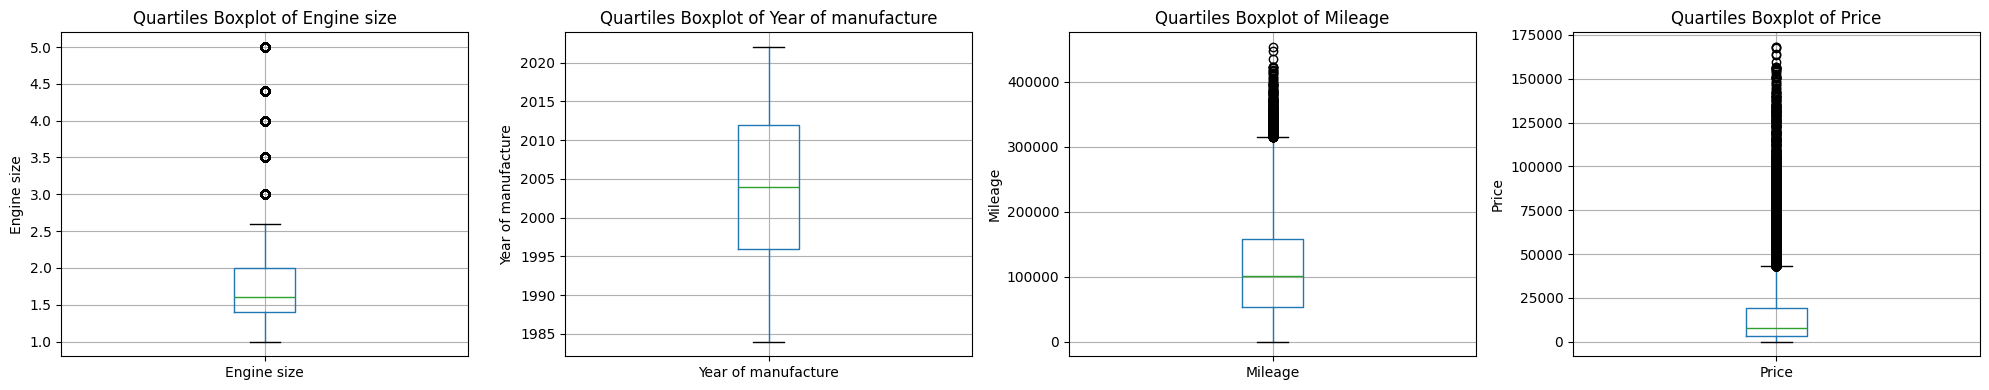

In [ ]:
# show plots in one row for numerical columns
fig, axes = plt.subplots(1, len(numerical.columns), figsize=(5 * len(numerical.columns), 4))

# ploting using box plot
for ax, col in zip(axes, numerical.columns):
    numerical.boxplot(column=col, ax=ax)
    ax.set_title(f"Quartiles Boxplot of {col}")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

#### Z-Score

In [ ]:
# calculate the outliers using z-score
for col in numerical.columns:
  # calculate mean
  numeric_mean = data[col].sum() / data.shape[0]
  # calculate variance
  numeric_variance = ((data[col] - numeric_mean) ** 2).sum() / (data.shape[0] - 1)
  # calculate std
  numeric_std = np.sqrt(numeric_variance)
  # calculate z-core
  z_score = (data[col] - numeric_mean) / numeric_std

  # check if point far from z-score by 4 stds
  outliers_df1 = data[z_score.abs() > 4]
  ouliers_listz = []

  # gather outliers in one list
  for outlier in outliers_df1[col]:
    ouliers_listz.append(outlier)

  print(f"\nCalculated Outliers using Z-Score for {col} is \n{sorted(list(set(ouliers_listz)))}")


Calculated Outliers using Z-Score for Engine size is 
[5.0]

Calculated Outliers using Z-Score for Year of manufacture is 
[]

Calculated Outliers using Z-Score for Mileage is 
[400992, 402743, 405205, 405549, 408775, 412764, 413326, 413340, 416143, 417162, 417511, 421979, 422895, 423053, 423108, 434923, 446897, 453537]

Calculated Outliers using Z-Score for Price is 
[79526, 79750, 79790, 79845, 79959, 80167, 80214, 80293, 80346, 80378, 80387, 80421, 80541, 80569, 80576, 80652, 80687, 80781, 80831, 80901, 80986, 81080, 81104, 81253, 81271, 81290, 81405, 81448, 81582, 81585, 81629, 81652, 81725, 81758, 82031, 82034, 82135, 82260, 82391, 82475, 82526, 82584, 82709, 82723, 82800, 82873, 83018, 83185, 83194, 83241, 83299, 83326, 83331, 83387, 83464, 83473, 83491, 83493, 83715, 83835, 83853, 83905, 84047, 84080, 84090, 84135, 84155, 84169, 84298, 84344, 84380, 84413, 84591, 84613, 84637, 84655, 84714, 84819, 84841, 84916, 85043, 85073, 85097, 85105, 85145, 85160, 85248, 85330, 85365, 8536

Plot to check

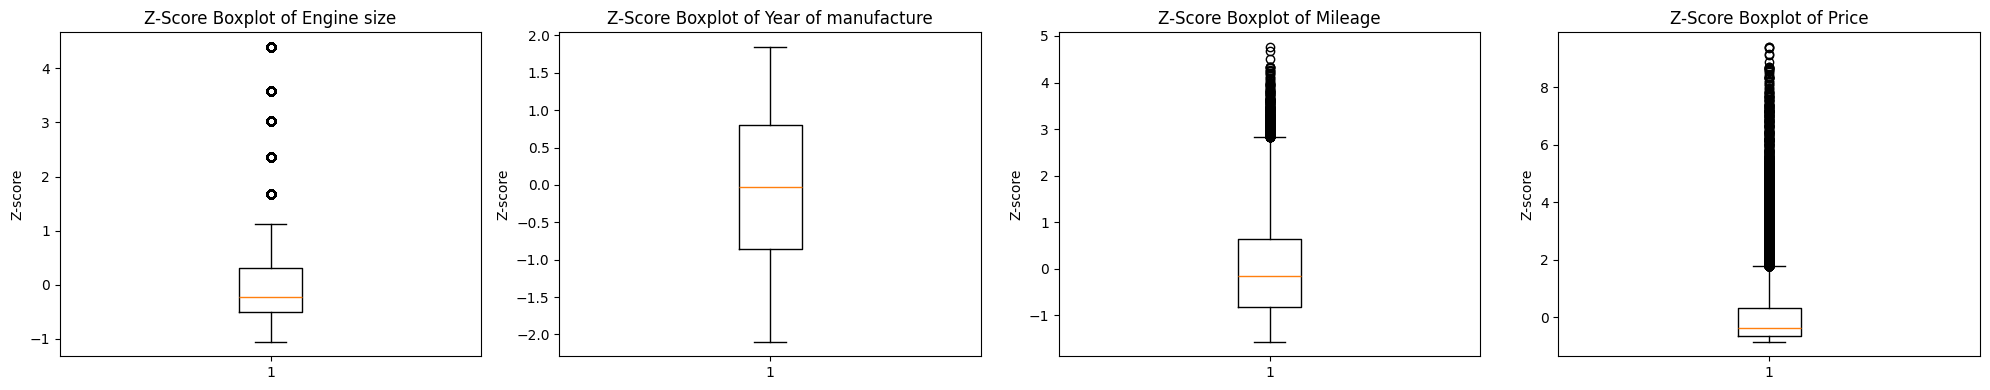

In [ ]:
# Actual z-score
zscored = numerical.apply(zscore)

# show plots in one row for numerical columns
fig, axes = plt.subplots(1, len(zscored.columns), figsize=(5 * len(zscored.columns), 4))

for ax, col in zip(axes, zscored.columns):
    ax.boxplot(zscored[col], vert=True)
    ax.set_title(f"Z-Score Boxplot of {col}")
    ax.set_ylabel("Z-score")

plt.tight_layout()
plt.show()

## Categorical Data Statistics

In [ ]:
# calculate the mode and compare it
for col in catigorical.columns:
    frequency = {}

    # count frequencies for this column
    for cat in catigorical[col]:
        frequency[cat] = frequency.get(cat, 0) + 1

    # find the max frequency
    max_frequency = max(frequency.values())

    # find all values with that frequency
    catigorical_mode = [k for k, v in frequency.items() if v == max_frequency]

    # print results once per column
    print(f"\nCalculated mode for {col}: {catigorical_mode}")
    print("Actual mode:", list(catigorical[col].mode()))


Calculated mode for Manufacturer: ['Ford']
Actual mode: ['Ford']

Calculated mode for Model: ['Mondeo']
Actual mode: ['Mondeo']

Calculated mode for Fuel type: ['Petrol']
Actual mode: ['Petrol']


# Missing value

In [ ]:
missing_value=data.isna().sum()
print(missing_value)

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


# Drop duplicated

In [ ]:
# Duplicated rows (could indicate over-sampling)
print(data.duplicated().sum())

12


In [ ]:
import pandas as pd

data1=data.drop_duplicates()

In [ ]:
# Duplicated rows (could indicate over-sampling)
print(data1.duplicated().sum())

0


# Shape

In [ ]:
data1.shape

(49988, 7)

#### Visualization

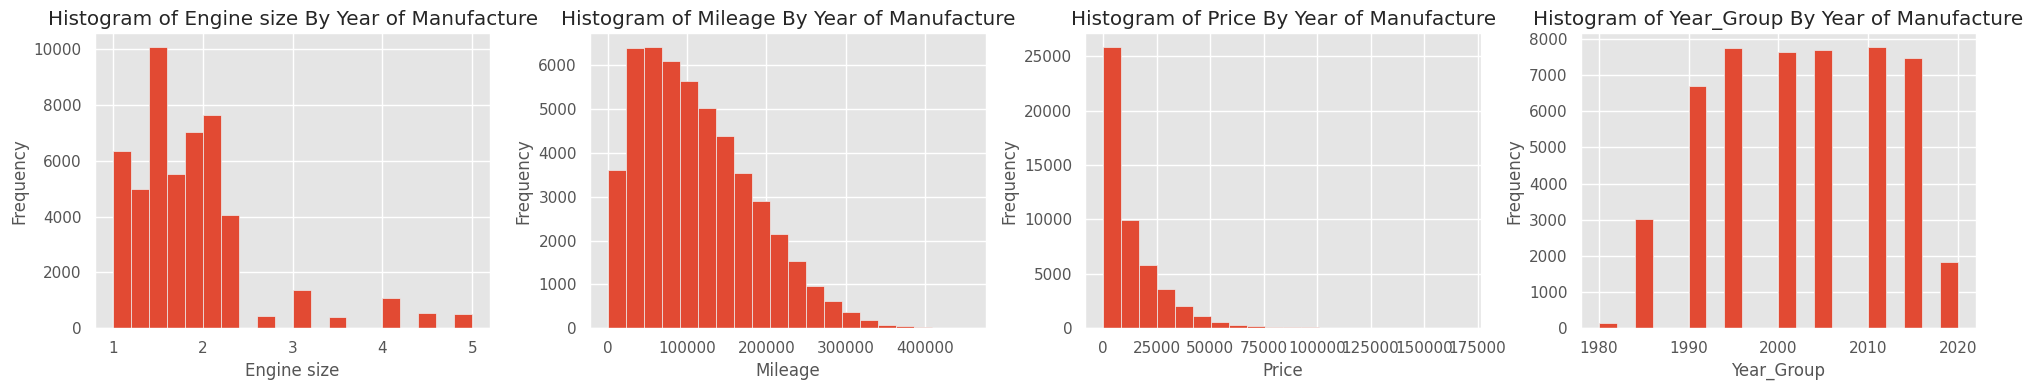

In [ ]:
# numerical columns compared to Year of Manufacture
fig, axes = plt.subplots(1, len(numerical.columns)-1, figsize=(5 * (len(numerical.columns)-1), 4))

# skip column at index 1 (Year of Manufacture)
cols_to_plot = [col for idx, col in enumerate(numerical.columns) if idx != 1]

for ax, col in zip(axes, cols_to_plot):
    numerical[col].hist(ax=ax, bins=20)
    ax.set_title(f"Histogram of {col} By Year of Manufacture")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

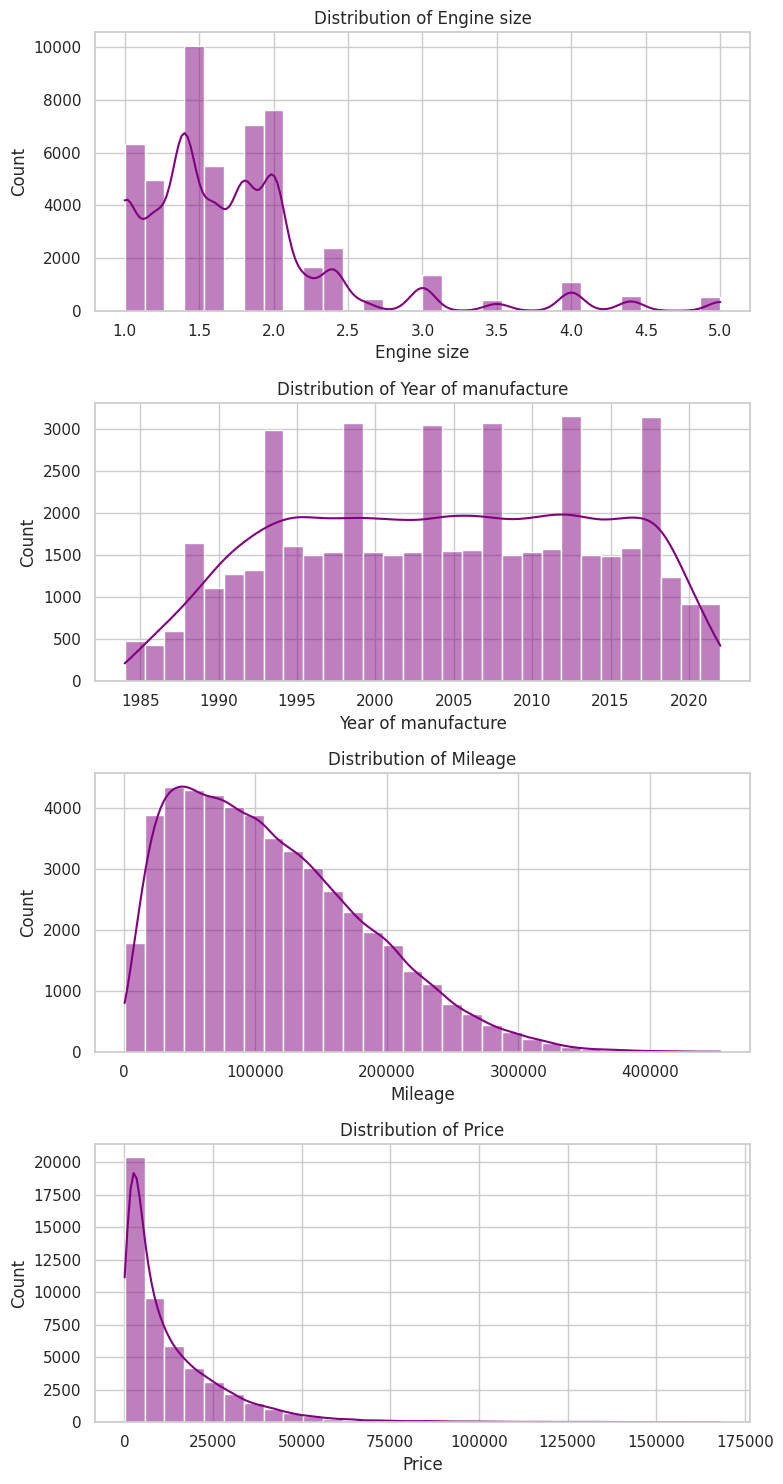

In [ ]:
# Histograms for all numerical features
fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(8, 15))

for ax, col in zip(axes, numerical.columns):
    sns.histplot(data[col], bins=30, kde=True, ax=ax, color="purple")
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


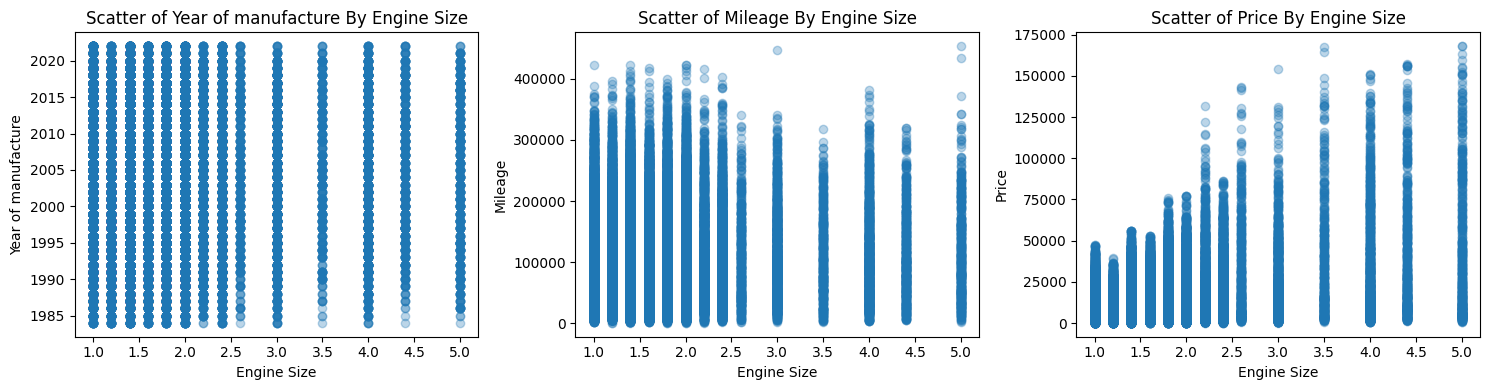

In [ ]:
# numerical columns compared to Engine Size
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(5 * len(cols_to_plot), 4))

# # skip column at index 0 (Engine Size)
cols_to_plot = [col for idx, col in enumerate(numerical.columns) if idx != 0]

# Plot each column
for ax, col in zip(axes, cols_to_plot):
    ax.scatter(numerical["Engine size"], numerical[col], alpha=0.3)
    ax.set_title(f"Scatter of {col} By Engine Size")
    ax.set_xlabel("Engine Size")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
data1 = data1.drop(columns=['Car_Status'])


/tmp/ipython-input-3862574700.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-3862574700.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-3862574700.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])


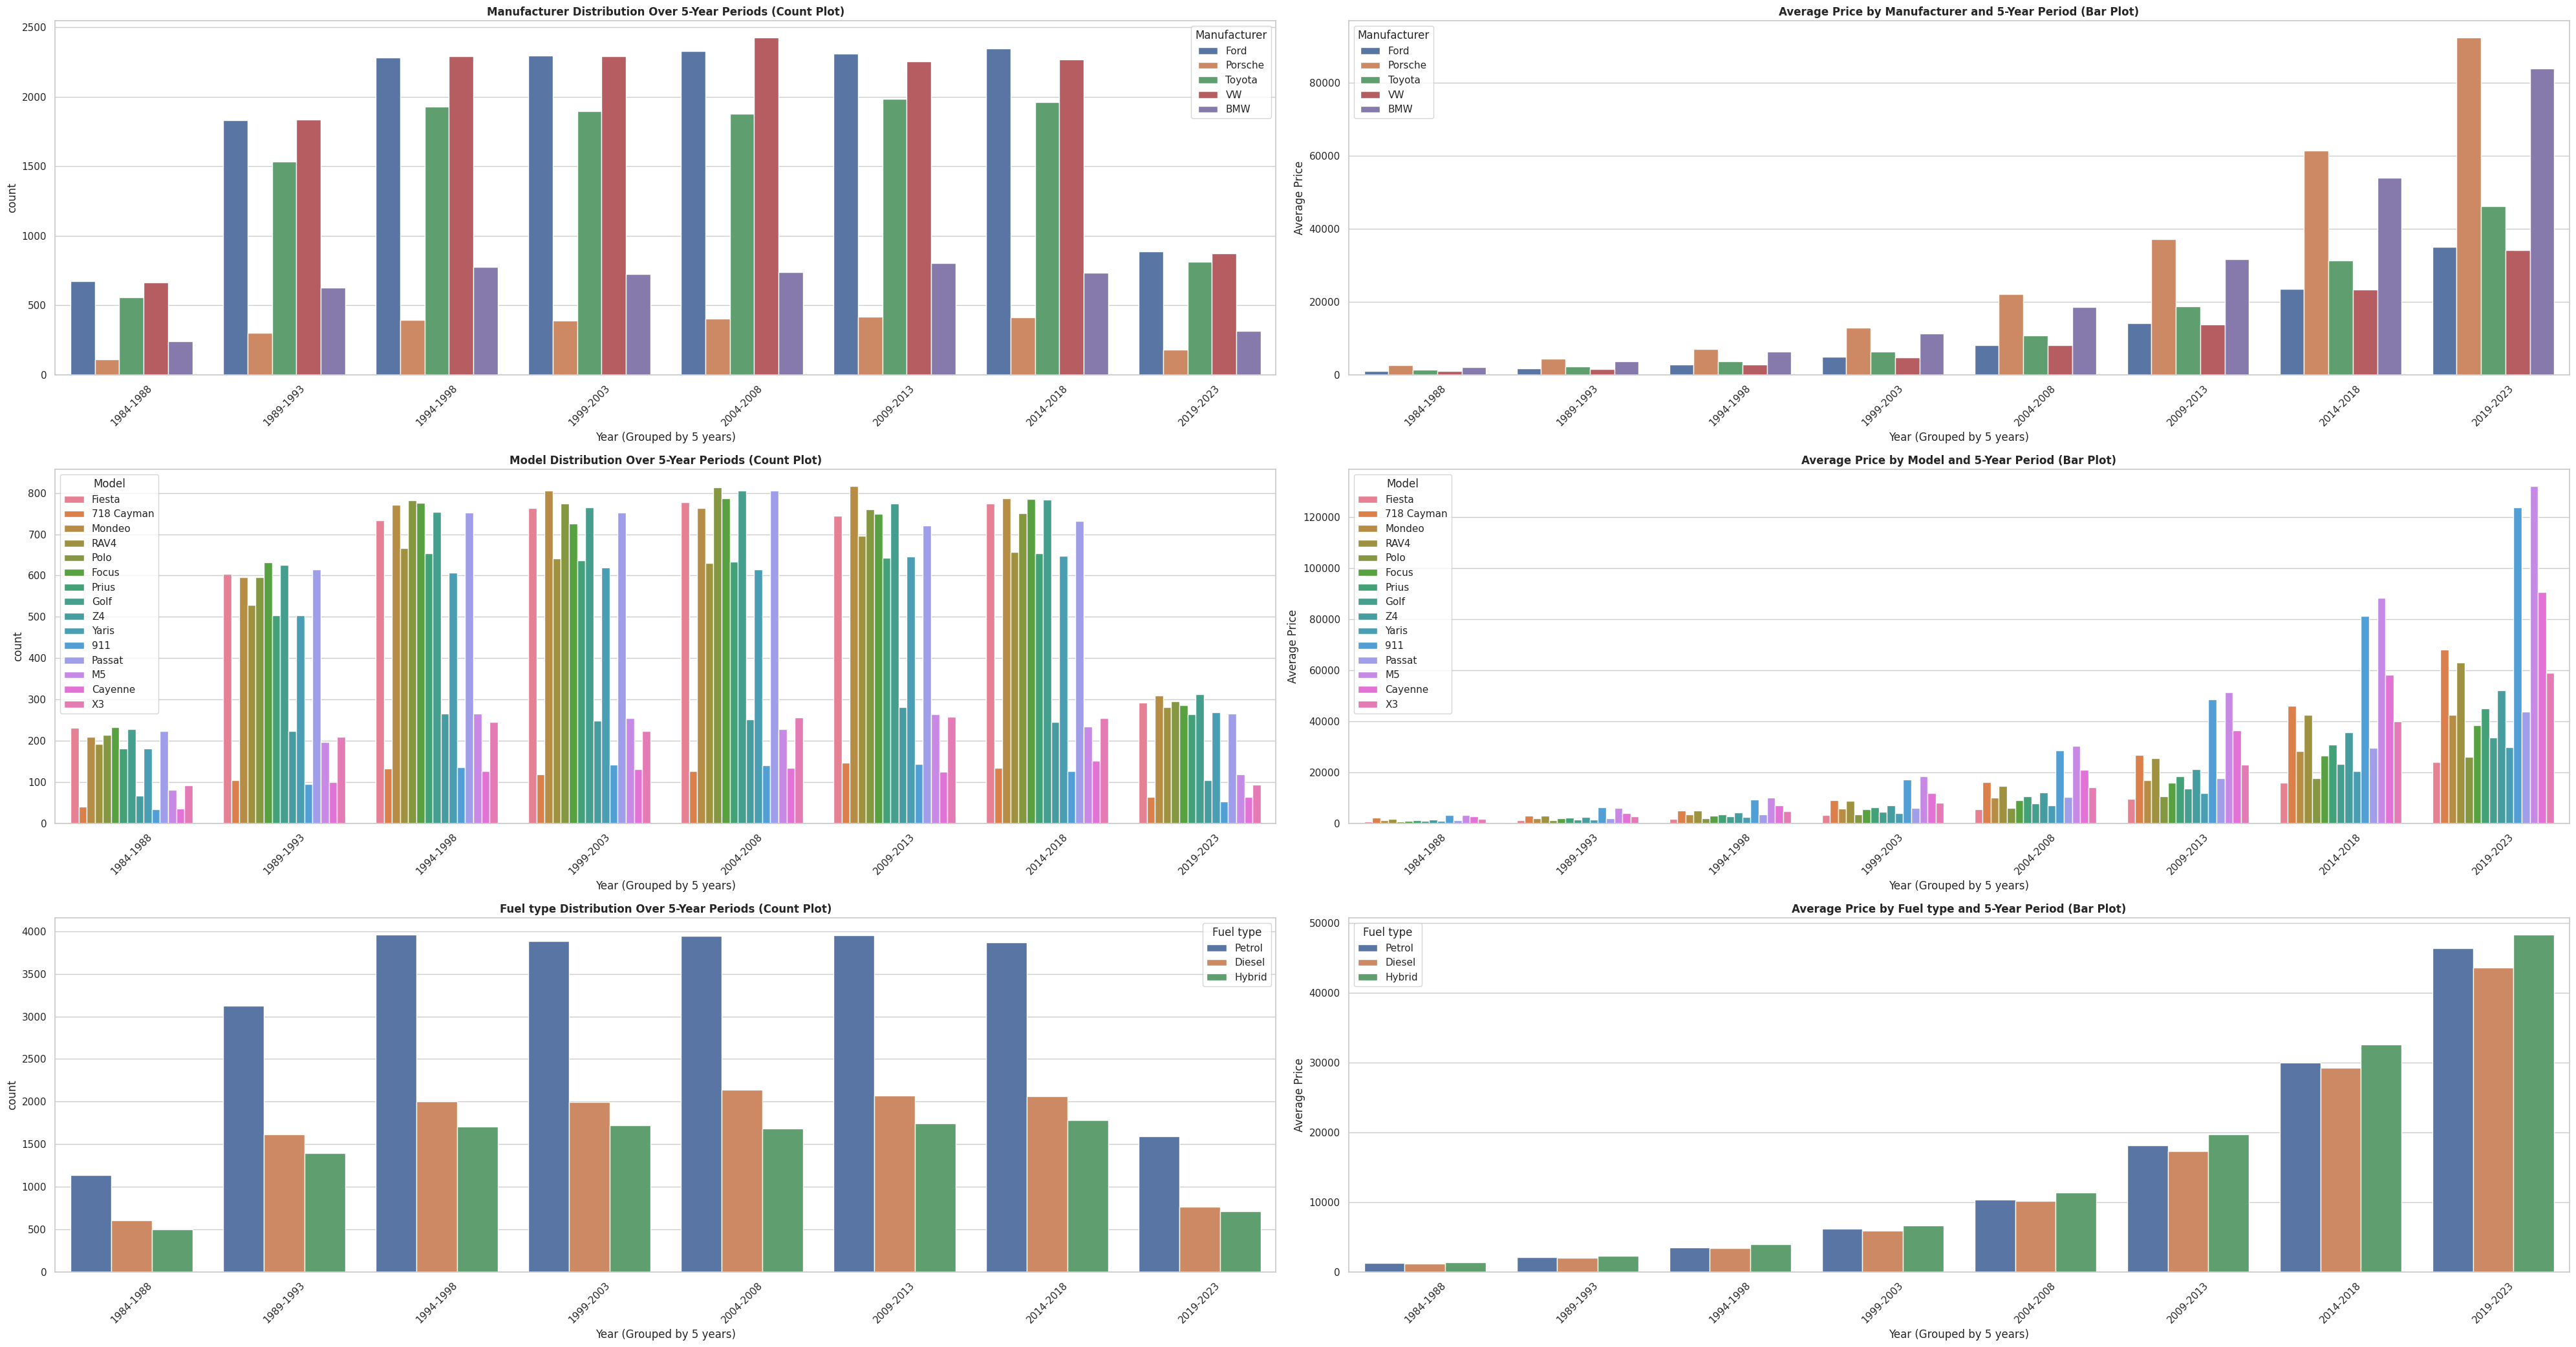

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Create a new column for 5-year bins
data1['Year_bin'] = pd.cut(
    data1['Year of manufacture'],
    bins=range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max() + 5, 5),
    right=False,
    labels=[f"{y}-{y+4}" for y in range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max(), 5)]
)

# Select categorical columns
categorical = data1.select_dtypes(include='object')  # or include='category'
year_col = 'Year_bin'  # use the new grouped column

# Set up subplots (2 plots per categorical column)
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 7 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Count plot (how many cars of each category per 5-year bin)
    sns.countplot(data=data1, x=year_col, hue=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution Over 5-Year Periods (Count Plot)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("Year (Grouped by 5 years)")

    # 2. Bar plot (average price per category per 5-year bin)
    sns.barplot(data=data1, x=year_col, y='Price', hue=col, ci=None, ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Price by {col} and 5-Year Period (Bar Plot)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("Year (Grouped by 5 years)")
    axes[i, 1].set_ylabel("Average Price")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-444371992.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupby([year_col, col]).size().reset_index(name='Count')
/tmp/ipython-input-444371992.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = data1.groupby([year_col, col])['Price'].mean().reset_index()
/tmp/ipython-input-444371992.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupby([

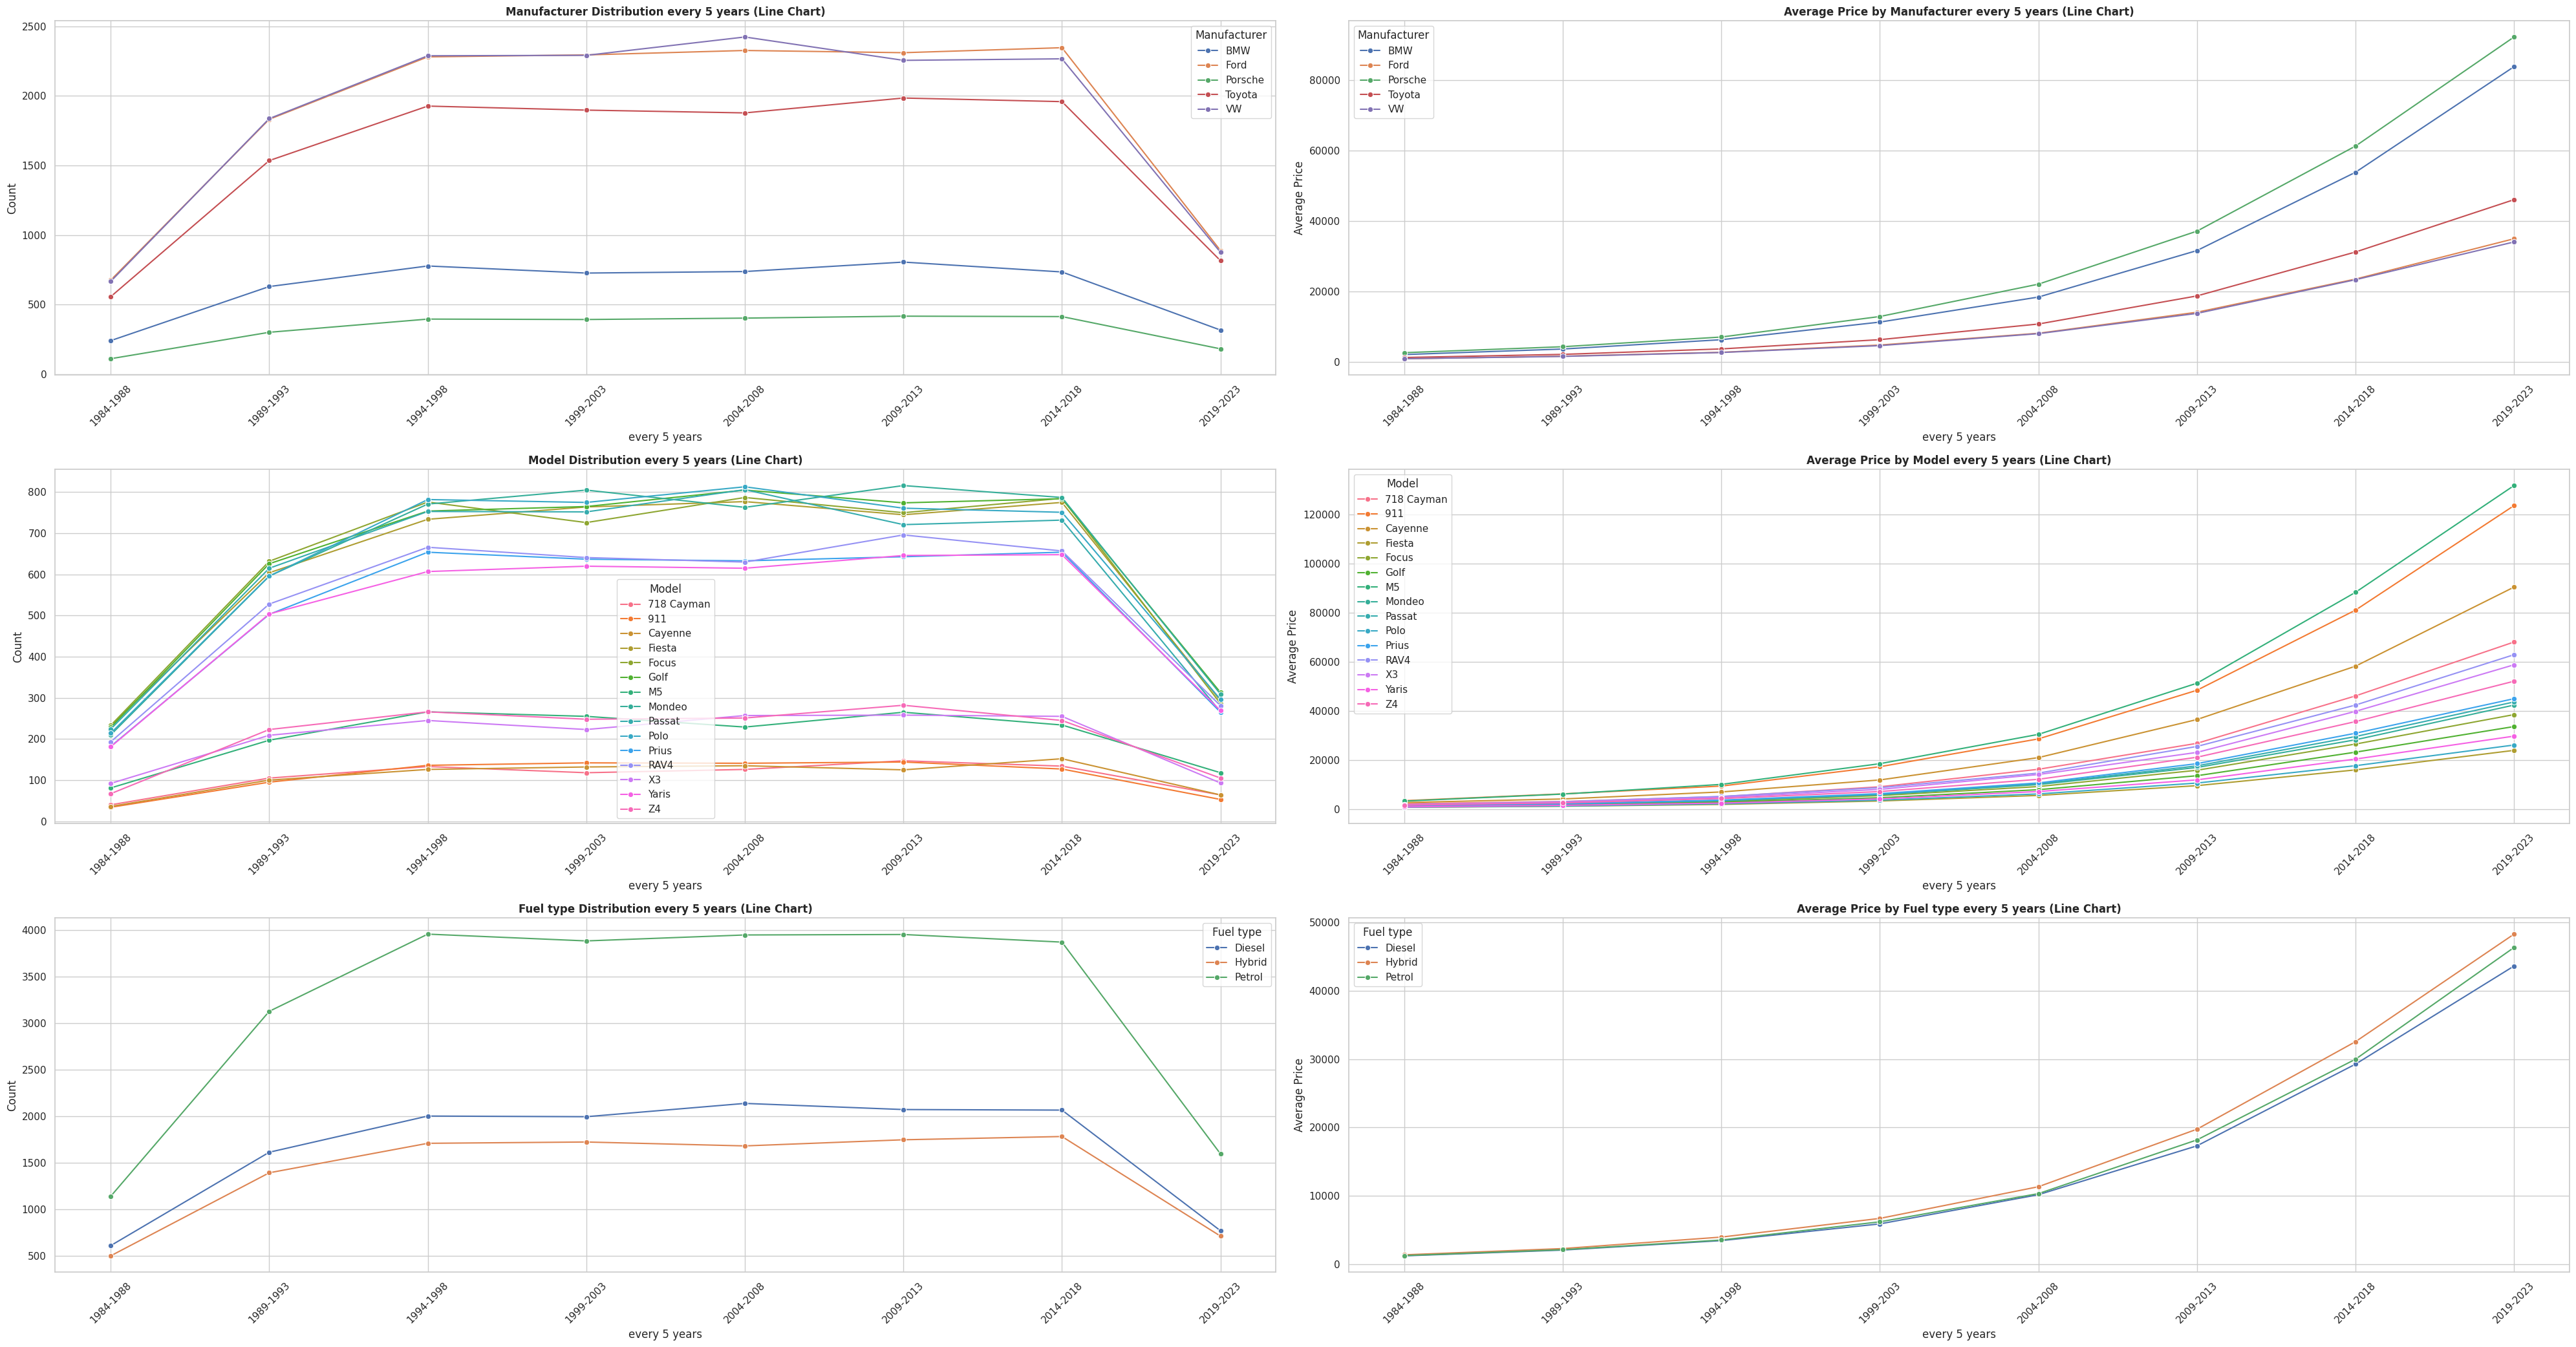

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Create a new column for 5-year bins
data1['Years of manufacture'] = pd.cut(
    data1['Year of manufacture'],
    bins=range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max() + 5, 5),
    right=False,
    labels=[f"{y}-{y+4}" for y in range(data1['Year of manufacture'].min(), data1['Year of manufacture'].max(), 5)]
)

# Select categorical columns, optionally exclude 'Used/New Car' if needed
categorical = data1.select_dtypes(include='object').drop(columns=['Used/New Car'], errors='ignore')
year_col = 'Years of manufacture'

# Set up subplots (2 plots per categorical column)
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 7 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Line plot: count of cars per category per 5-year bin
    count_data = data1.groupby([year_col, col]).size().reset_index(name='Count')
    sns.lineplot(data=count_data, x=year_col, y='Count', hue=col, marker='o', ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution every 5 years (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("every 5 years")
    axes[i, 0].set_ylabel("Count")

    # 2. Line plot: average price per category per 5-year bin
    avg_price = data1.groupby([year_col, col])['Price'].mean().reset_index()
    sns.lineplot(data=avg_price, x=year_col, y='Price', hue=col, marker='o', ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Price by {col} every 5 years (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("every 5 years")
    axes[i, 1].set_ylabel("Average Price")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-2951269013.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-2951269013.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])
/tmp/ipython-input-2951269013.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])


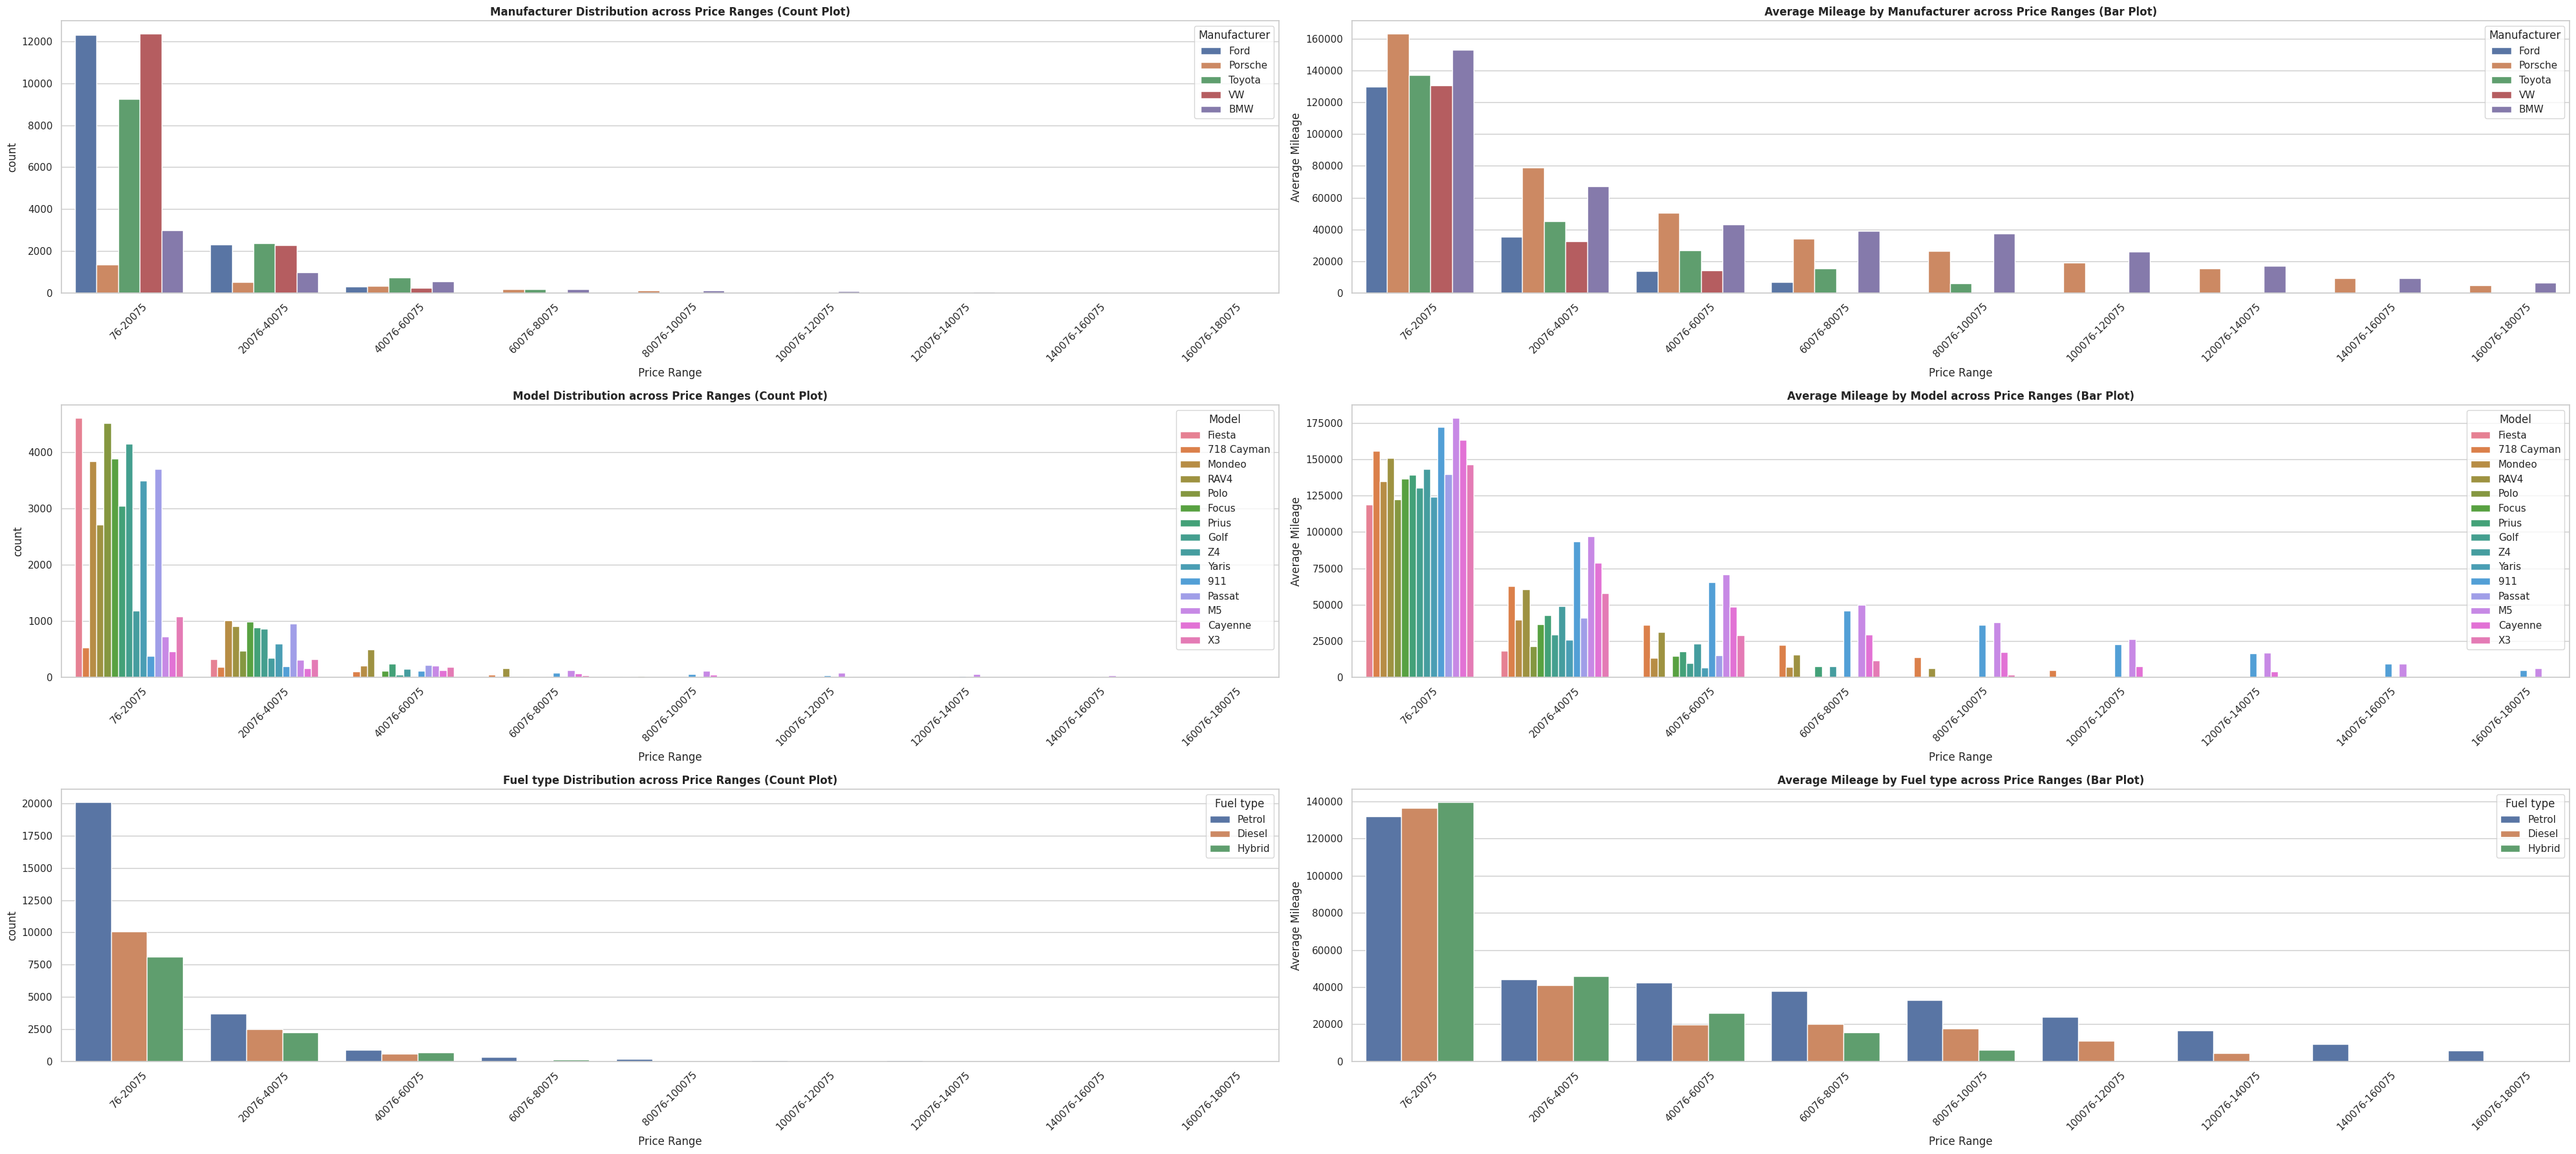

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Create a new column for price bins (grouping prices)
# Adjust bin size based on your data range (e.g., 5000 or 10000)
bin_size = 20000
data1['Price_Range'] = pd.cut(
    data1['Price'],
    bins=range(int(data1['Price'].min()), int(data1['Price'].max()) + bin_size, bin_size),
    right=False,
    labels=[f"{p}-{p+bin_size-1}" for p in range(int(data1['Price'].min()), int(data1['Price'].max()), bin_size)]
)

# Select categorical columns
categorical = data1.select_dtypes(include='object')
price_col = 'Price_Range'  # use the new grouped column for price

# Set up subplots
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 6 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Count plot: how many cars of each category per price range
    sns.countplot(data=data1, x=price_col, hue=col, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution across Price Ranges (Count Plot)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("Price Range")

    # 2. Bar plot: average mileage (or other numerical column) per category per price range
    sns.barplot(data=data1, x=price_col, y='Mileage', hue=col, ci=None, ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Mileage by {col} across Price Ranges (Bar Plot)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("Price Range")
    axes[i, 1].set_ylabel("Average Mileage")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipython-input-48718871.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupby([price_col, col]).size().reset_index(name='Count')
/tmp/ipython-input-48718871.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mileage = data1.groupby([price_col, col])['Mileage'].mean().reset_index()
/tmp/ipython-input-48718871.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data1.groupb

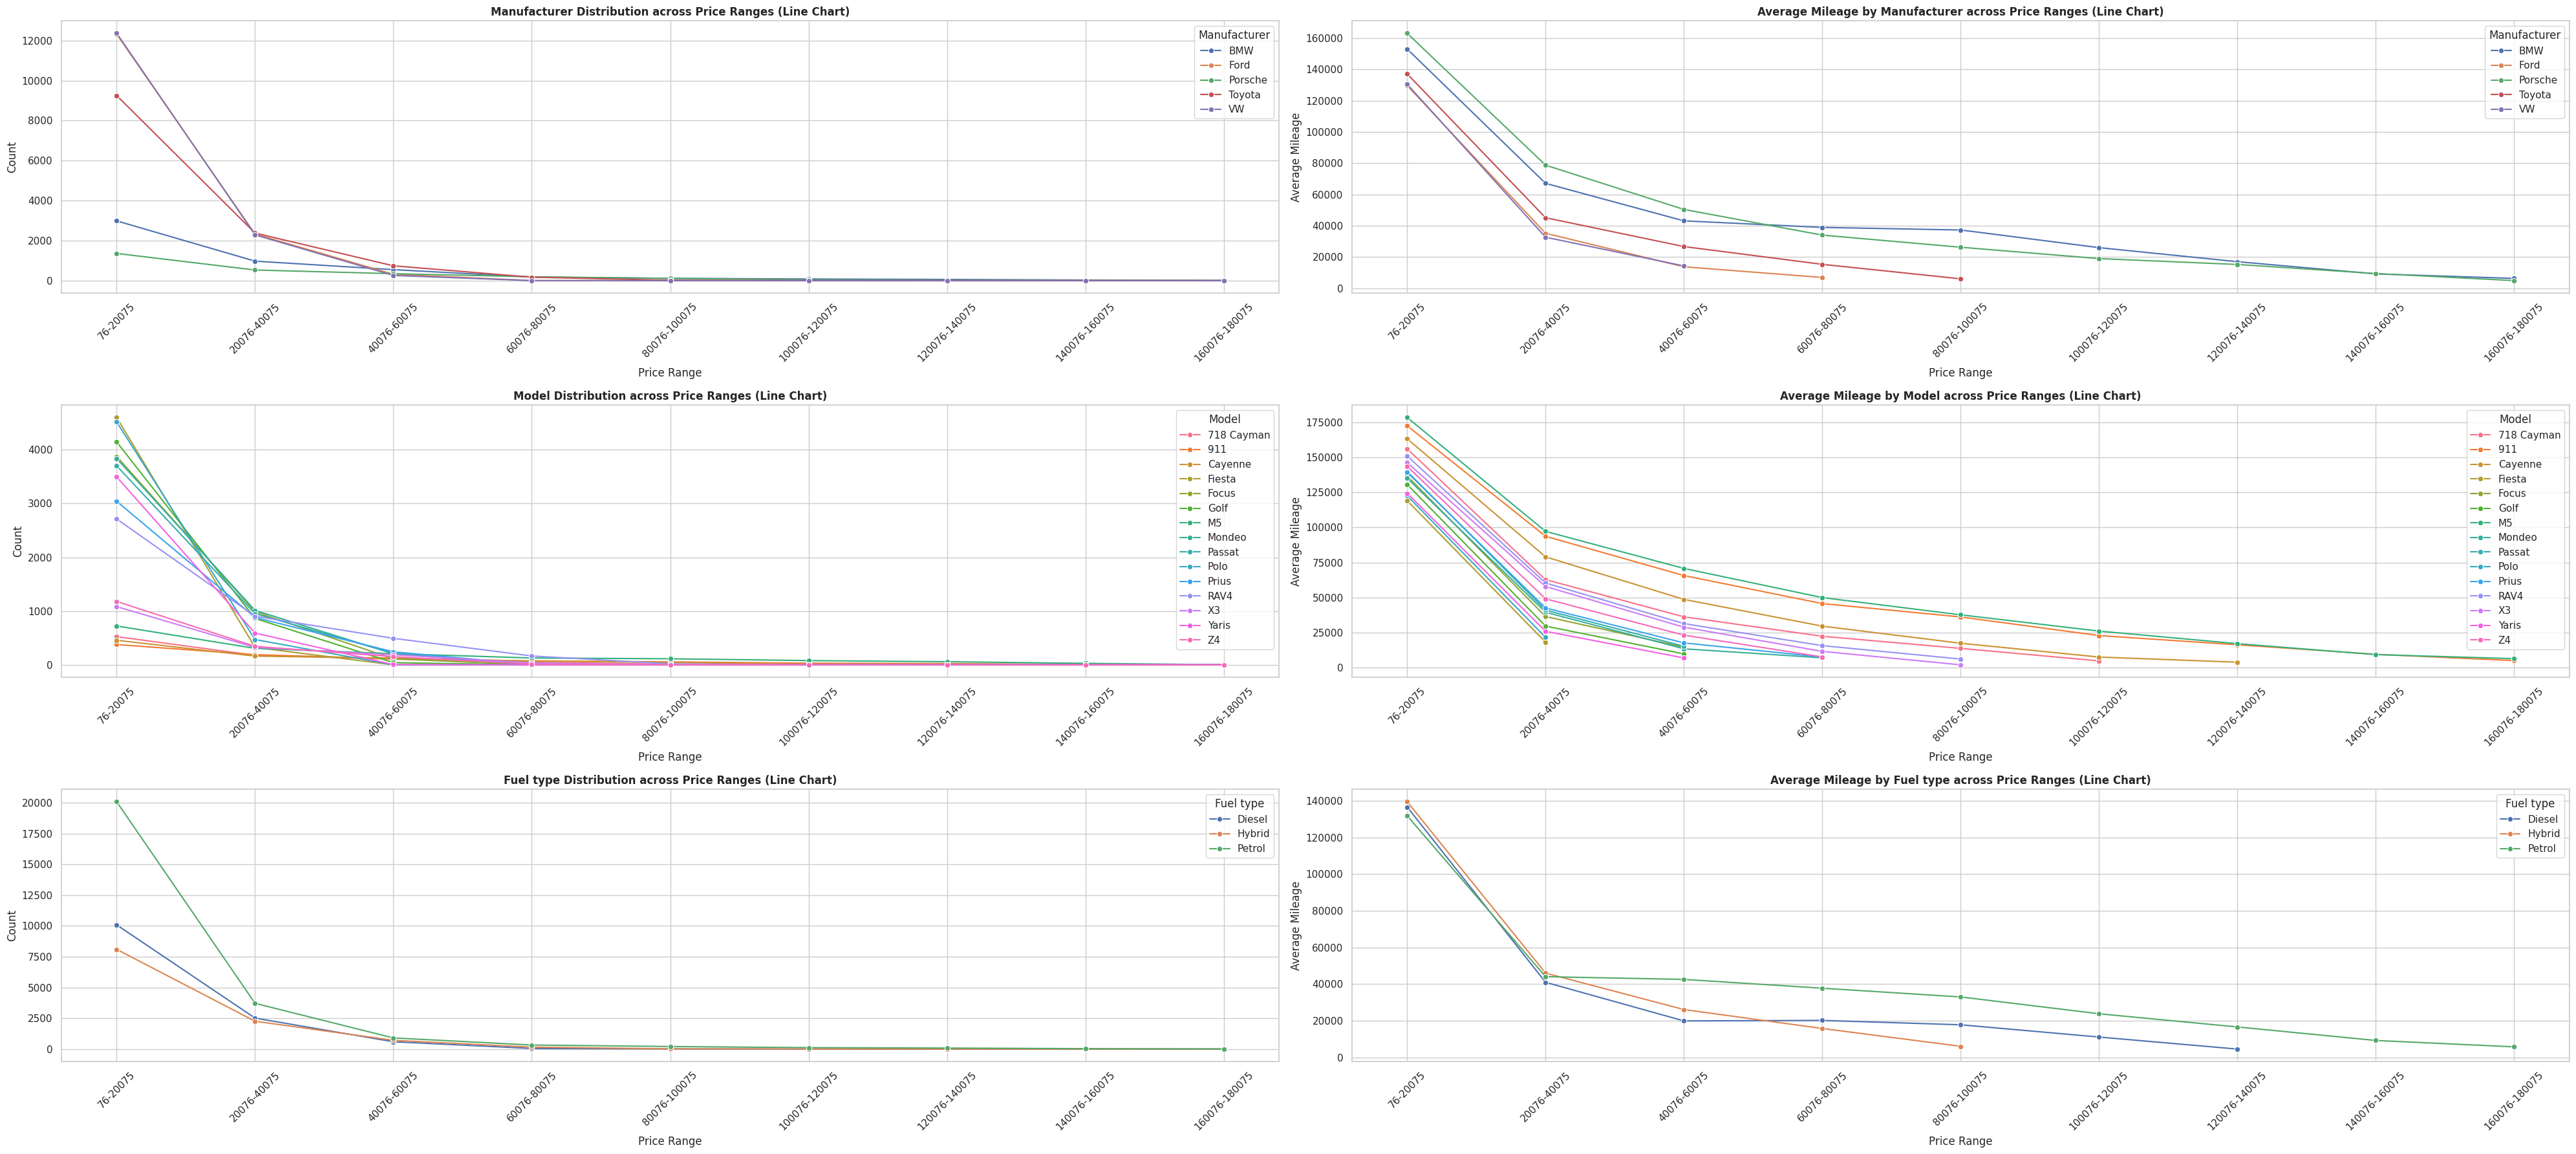

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set visual style
sns.set(style='whitegrid')

# Define price bin size (e.g., 10000 for 10k, 20000 for 20k)
bin_size = 20000  # you can change this to 10000, 5000, etc.
data1['Price_Range'] = pd.cut(
    data1['Price'],
    bins=range(int(data1['Price'].min()), int(data1['Price'].max()) + bin_size, bin_size),
    right=False,
    labels=[f"{p}-{p+bin_size-1}" for p in range(int(data1['Price'].min()), int(data1['Price'].max()), bin_size)]
)

# Select categorical columns, optionally exclude 'Used/New Car' if needed
categorical = data1.select_dtypes(include='object').drop(columns=['Used/New Car'], errors='ignore')
price_col = 'Price_Range'

# Set up subplots
fig, axes = plt.subplots(len(categorical.columns), 2, figsize=(40, 6 * len(categorical.columns)))

for i, col in enumerate(categorical.columns):
    # 1. Line plot: count of cars per category per price bin
    count_data = data1.groupby([price_col, col]).size().reset_index(name='Count')
    sns.lineplot(data=count_data, x=price_col, y='Count', hue=col, marker='o', ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} Distribution across Price Ranges (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 0].tick_params(axis='x', rotation=45)
    axes[i, 0].set_xlabel("Price Range")
    axes[i, 0].set_ylabel("Count")

    # 2. Line plot: average mileage per category per price bin
    avg_mileage = data1.groupby([price_col, col])['Mileage'].mean().reset_index()
    sns.lineplot(data=avg_mileage, x=price_col, y='Mileage', hue=col, marker='o', ax=axes[i, 1])
    axes[i, 1].set_title(f"Average Mileage by {col} across Price Ranges (Line Chart)", fontsize=12, fontweight="bold")
    axes[i, 1].tick_params(axis='x', rotation=45)
    axes[i, 1].set_xlabel("Price Range")
    axes[i, 1].set_ylabel("Average Mileage")

# Adjust layout
plt.tight_layout()
plt.show()


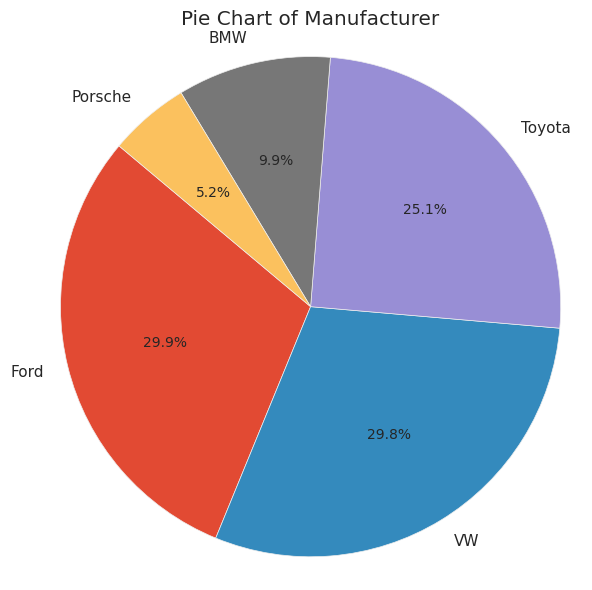

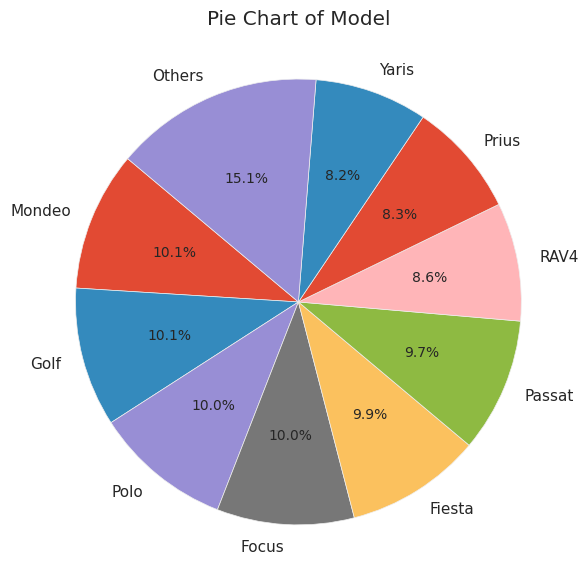

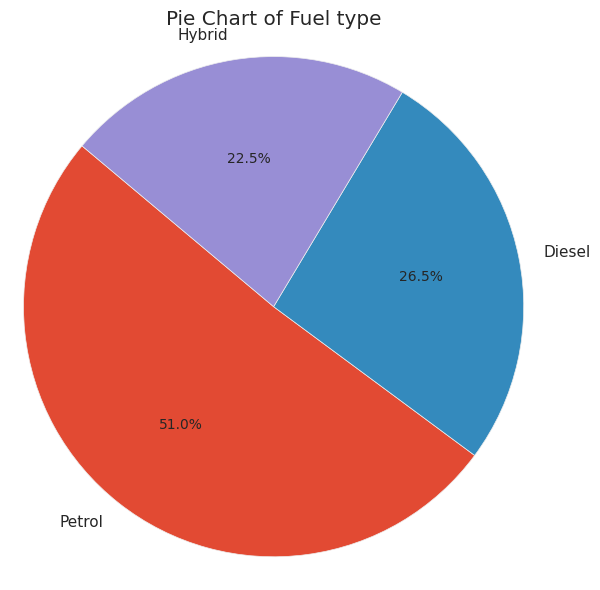

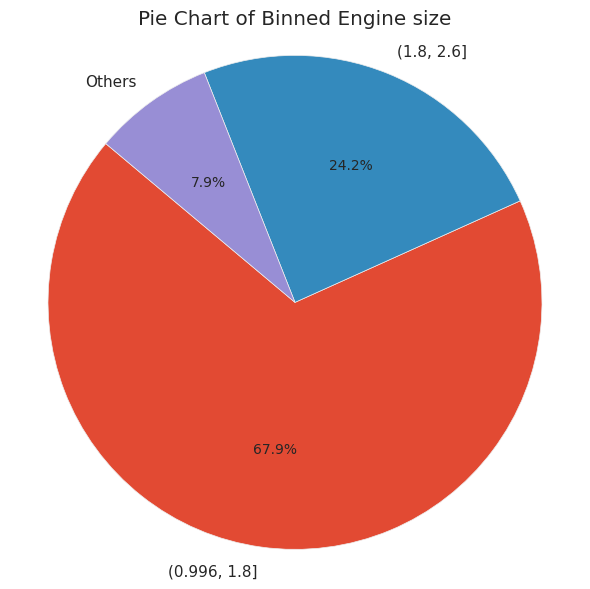

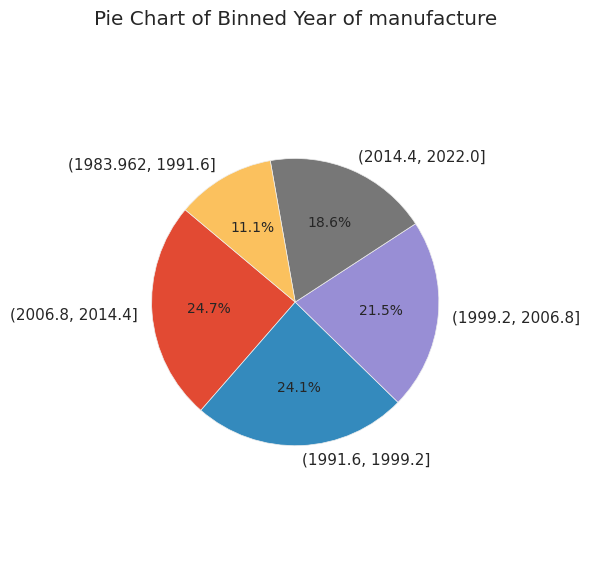

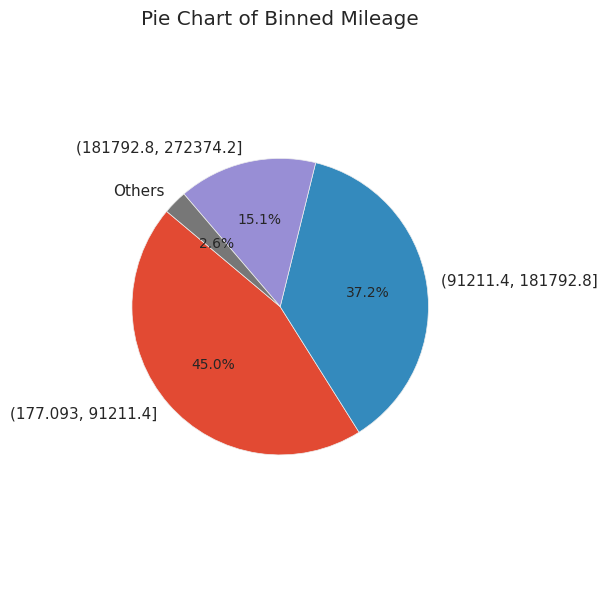

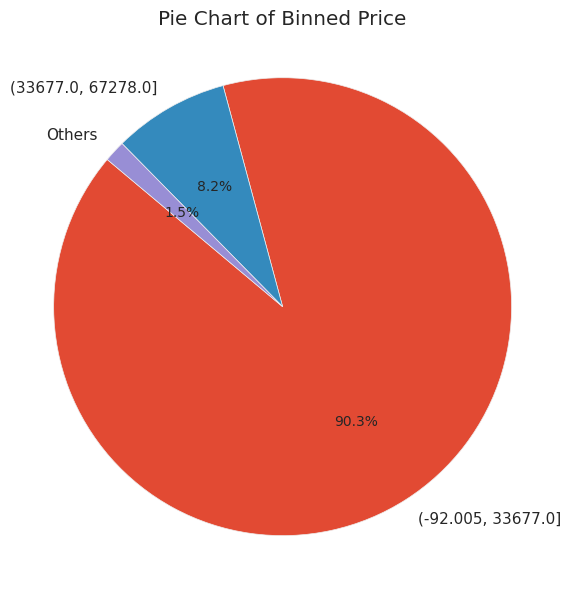

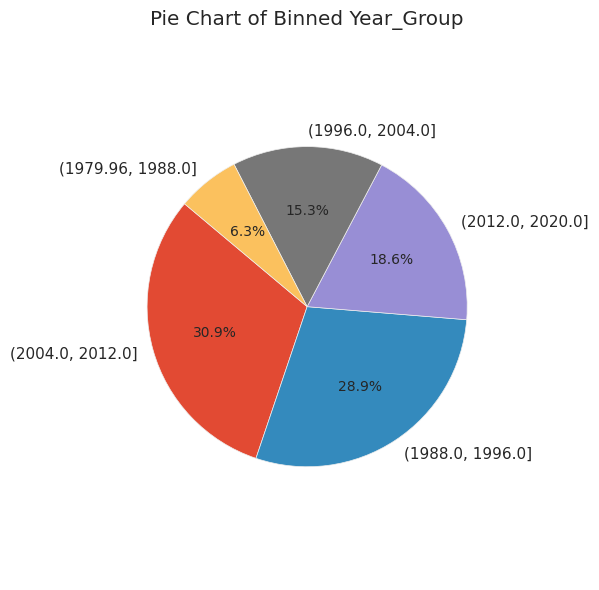

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify numerical and categorical columns
numerical_cols = data1.select_dtypes(include='number').columns
categorical_cols = data1.select_dtypes(include='object').columns

# Set figure style
plt.style.use('ggplot')

# --- PIE CHARTS FOR CATEGORICAL COLUMNS ---
for col in categorical_cols:
    counts = data1[col].value_counts(normalize=True) * 100  # percentages

    # Separate values < 5% into "Others"
    small = counts[counts < 5].sum()   # sum of all small categories
    counts = counts[counts >= 5]       # keep big categories
    if small > 0:
        counts["Others"] = small       # add Others category

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f"Pie Chart of {col}")
    plt.axis('equal')  # Equal aspect ratio ensures a circle
    plt.tight_layout()
    plt.show()

# --- PIE CHARTS FOR NUMERICAL COLUMNS ---
# Group numerical values into bins and count their occurrences
for col in numerical_cols:
    binned = pd.cut(data1[col], bins=5)  # divide into 5 bins
    counts = binned.value_counts(normalize=True) * 100  # percentages

    # Group bins < 5% into "Others"
    small = counts[counts < 5].sum()
    counts = counts[counts >= 5]
    if small > 0:
        counts["Others"] = small

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=[str(interval) for interval in counts.index],
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f"Pie Chart of Binned {col}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


# SAVE DATA CSV AFTER CLEANING

In [ ]:
# Save the DataFrame to a CSV file after cleaning
data1.to_csv('processed_car_sales_data.csv', index=False)
print("DataFrame saved to 'processed_car_sales_data.csv'")
from google.colab import files

# Trigger file download
files.download('processed_car_sales_data.csv')